#### Outliers 
- Outliers decreases the performance of our machine learning models, so handling outliers is very important 
- To find out the outliers we take a boxplot and from we can make guess, or with using the concept of interquatile range and max and min values we can make range for effective values 
 

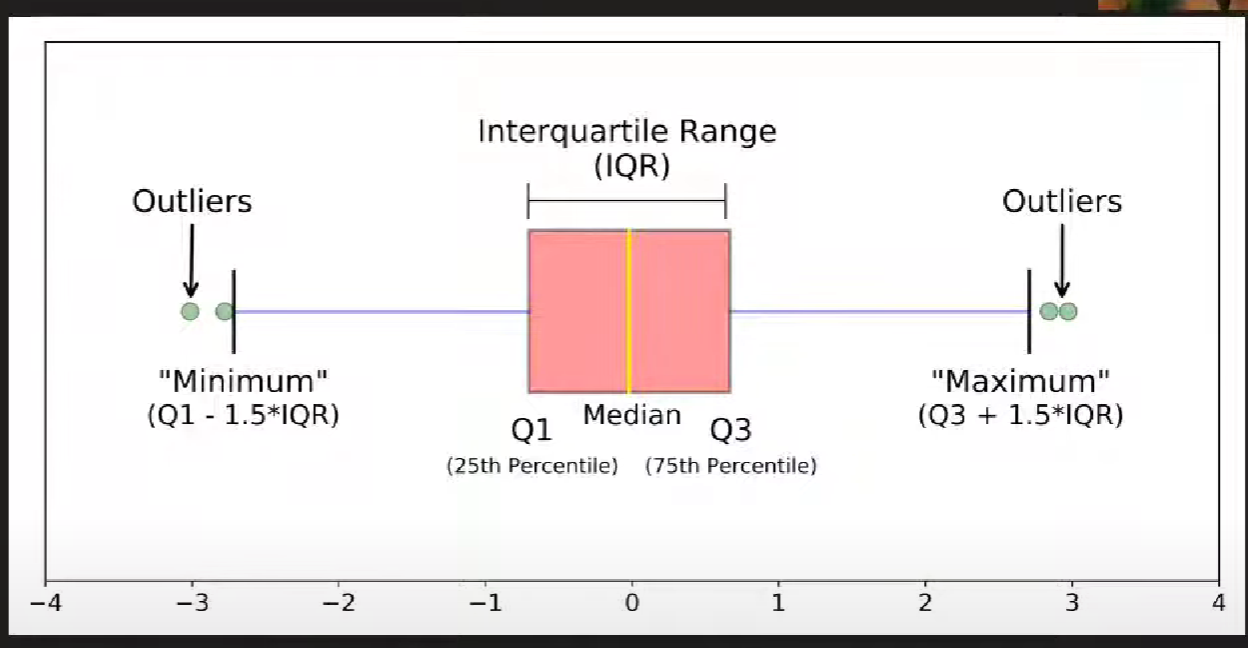

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [4]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

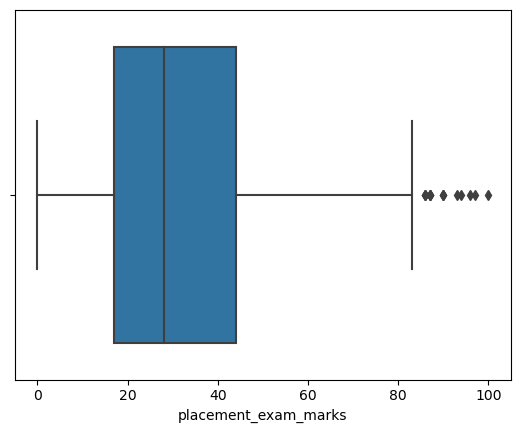

In [5]:
sns.boxplot(df['placement_exam_marks'])

- We can clearly see the outliers after Q3, so there are two methods to handle the outliers
1. Removing the outliers 
- In this method we will remove the outliers values completely. 

2. Capping
- In capping we will replace the outliers with the maximum or minimum value allowed from the IQR formula 


In [6]:
# The IQR formula 

percentile_25 = df.placement_exam_marks.quantile(0.25)
percentile_75 = df.placement_exam_marks.quantile(0.75)


In [7]:
percentile_25, percentile_75

(17.0, 44.0)

In [8]:
IQR = percentile_75 - percentile_25
IQR

27.0

In [9]:
lower_limit = percentile_25 - (1.5*(IQR))
higher_limit = percentile_75 + (1.5*(IQR))
lower_limit, higher_limit 
# marks are not negative here so lower capping will be Zero only 

(-23.5, 84.5)

### Finding Outliers 

In [10]:
df[df['placement_exam_marks']>higher_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [11]:
# Now we can either remove all these rows or we can put them all equal to maximum limit 

### Trimming 


In [12]:
new_df = df[df['placement_exam_marks']>higher_limit]

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

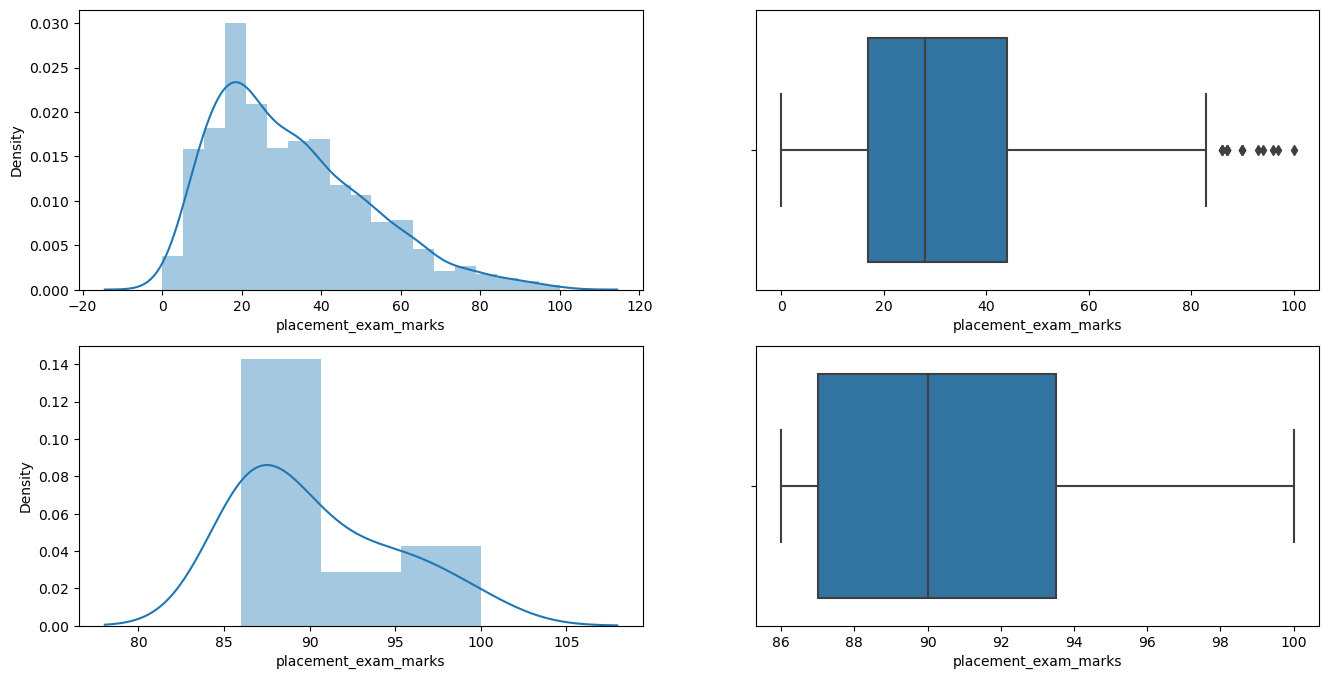

In [13]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

### Capping 

In [14]:
# this is important and where statement in the numpy 
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(new_df_cap['placement_exam_marks'] > higher_limit, 
                                              higher_limit,
                                              np.where(new_df_cap['placement_exam_marks'] < lower_limit,
                                              lower_limit, 
                                               new_df_cap['placement_exam_marks']
                                              )
                                               )

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

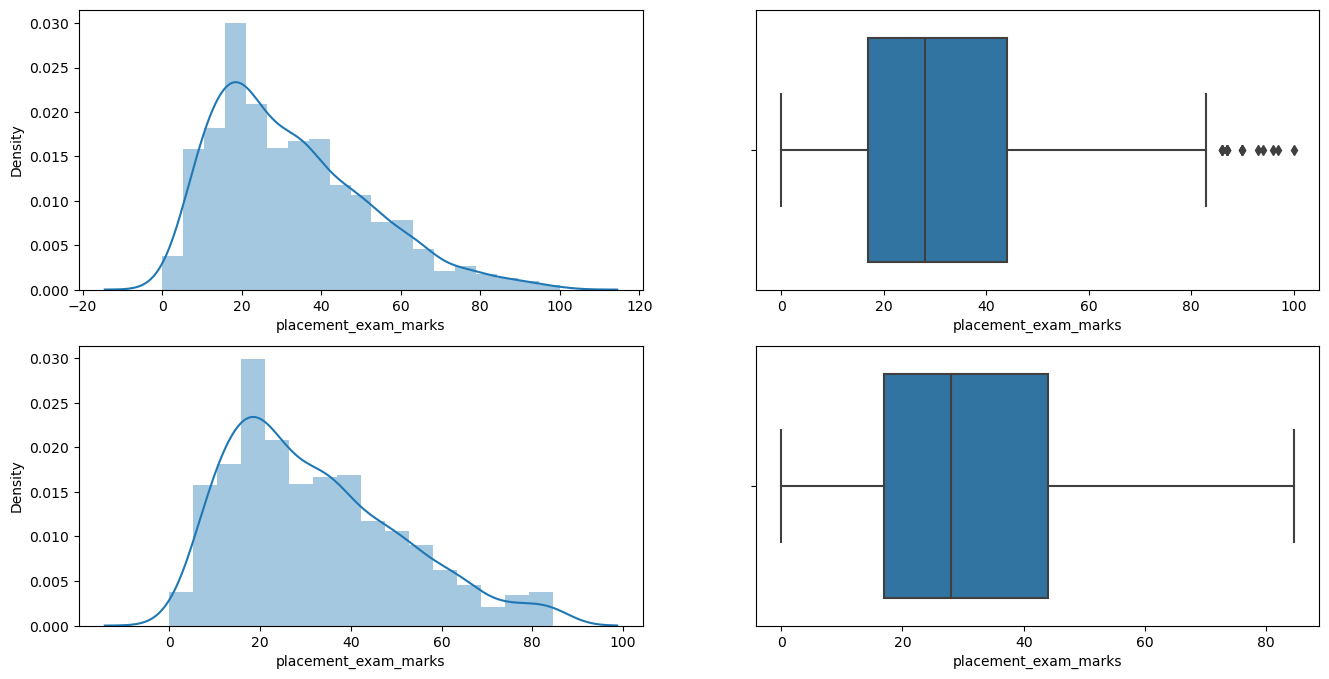

In [15]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()


In [ ]:
pl